# Satellite Image Classification for Land Cover Mapping

The main objective of this project is to classify the types of land from the their images obtained via satellite. We will build a simple deep learing image classification model using convolutional neural network and evaluate the performance of it.The dataset contain 10 distinct types of land area such as annual crop,forest,highway,river etc.

In [ ]:
# !kaggle datasets download -d pranjallk1995/rgbeurosat

In [ ]:
# !unzip /content/rgbeurosat.zip

In [ ]:
# !cp -r /content/RBG /content/drive/MyDrive/CNN_project_split

In [ ]:
import os
import cv2

In [ ]:
training='/content/drive/MyDrive/CNN_project_split/RBG/train'
categories=os.listdir(training)
x_train=[]
y_train=[]
for category in categories:
  subpath=os.path.join(training,category)
  img_lst=os.listdir(subpath)
  for img in img_lst:
    img_path=os.path.join(subpath,img)
    img_array=cv2.imread(img_path,1)
    # print(img_array.shape)
    img_resize=cv2.resize(img_array,(64,64))
    img_final=img_resize.reshape(64,64,3)
    # img_final=img_final/255
    x_train.append(img_final)
    y_train.append(category)

In [ ]:
print(img_array.shape)

(64, 64, 3)


In [ ]:
len(x_train)
len(y_train)

21600

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
def display_random_images(x_train, y_train, num_images=10):
    plt.figure(figsize=(16, 16))
    for i in range(num_images):
        idx = random.randint(0, len(x_train) - 1)
        img = x_train[idx]
        lbl = y_train[idx]
        ax = plt.subplot(4, 3, i + 1)
        ax.imshow(img)
        ax.set_title(lbl)
        ax.axis("off")

    plt.show()

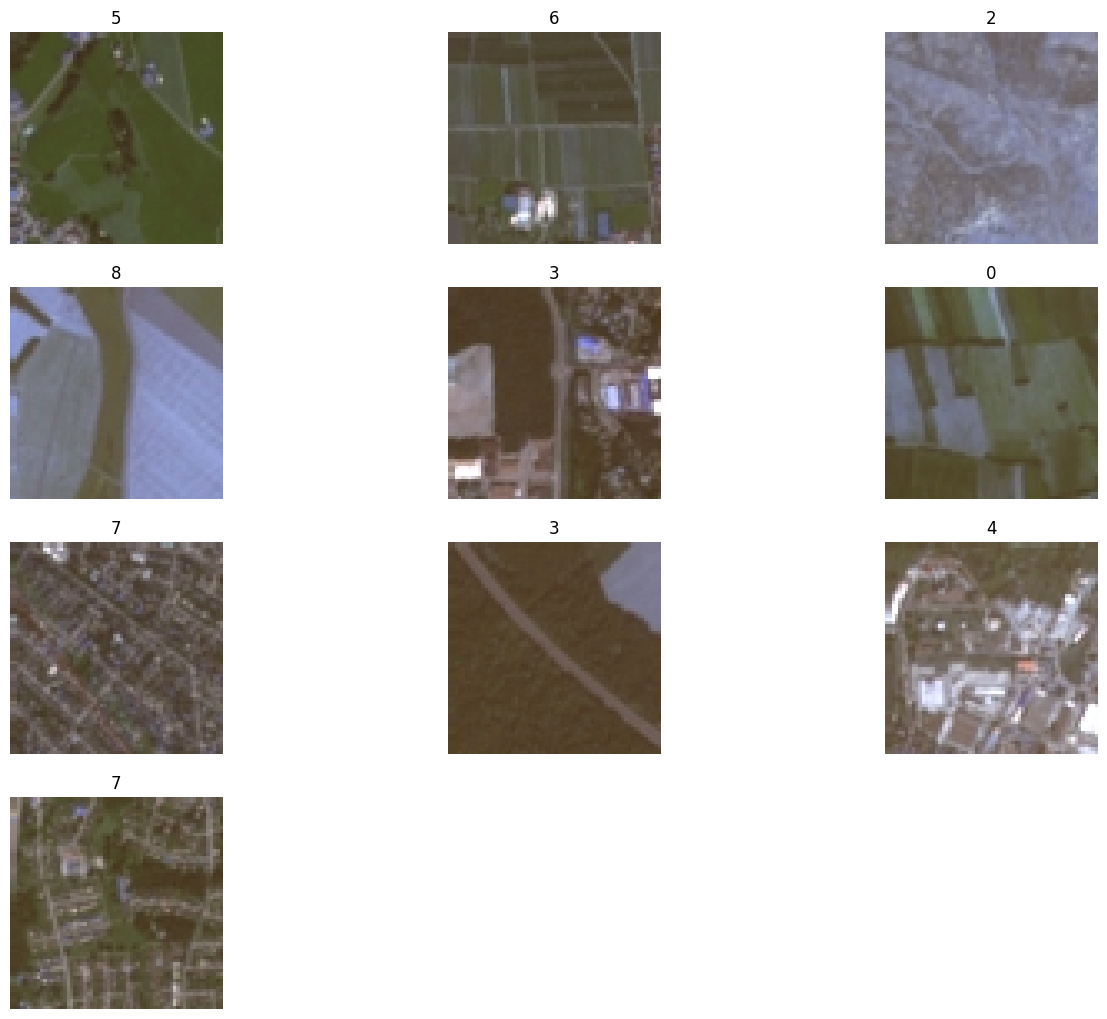

In [ ]:
display_random_images(x_train, y_train)

In [ ]:
testing='/content/drive/MyDrive/CNN_project_split/RBG/test'
categories=os.listdir(testing)
x_test=[]
y_test=[]
for category in categories:
  subpath=os.path.join(testing,category)
  img_lst=os.listdir(subpath)
  for img in img_lst:
    img_path=os.path.join(subpath,img)
    img_array=cv2.imread(img_path,1)
    # print(img_array.shape)
    img_resize=cv2.resize(img_array,(64,64))
    img_final=img_resize.reshape(64,64,3)
    # img_final=img_final/255
    x_test.append(img_final)
    y_test.append(category)

In [ ]:
len(x_test)
# len(y_test)

2700

In [ ]:
import numpy as np

In [ ]:
x_train=np.array(x_train)/255
x_test=np.array(x_test)/255

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense


Defining a CNN model with 3 Convolutional layers, 1 Flatten layer and 3 Dense layers


In [ ]:
model=Sequential([Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'),
                  MaxPool2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D(2,2),

                  Conv2D(128,(3,3),activation='relu'),
                  MaxPool2D(2,2),
                  Flatten(),
                  Dense(32,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
675/675 [==============================] - 16s 22ms/step - loss: 1.4582 - accuracy: 0.4199
Epoch 2/20
675/675 [==============================] - 16s 23ms/step - loss: 1.0144 - accuracy: 0.6166
Epoch 3/20
675/675 [==============================] - 15s 22ms/step - loss: 0.7976 - accuracy: 0.7088
Epoch 4/20
675/675 [==============================] - 15s 23ms/step - loss: 0.6813 - accuracy: 0.7531
Epoch 5/20
675/675 [==============================] - 16s 24ms/step - loss: 0.5980 - accuracy: 0.7852
Epoch 6/20
675/675 [==============================] - 15s 23ms/step - loss: 0.5464 - accuracy: 0.8050
Epoch 7/20
675/675 [==============================] - 15s 23ms/step - loss: 0.4890 - accuracy: 0.8221
Epoch 8/20
675/675 [==============================] - 16s 24ms/step - loss: 0.4516 - accuracy: 0.8387
Epoch 9/20
675/675 [==============================] - 16s 24ms/step - loss: 0.4071 - accuracy: 0.8554
Epoch 10/20
675/675 [==============================] - 16s 24ms/step - loss: 0.358

In [ ]:
model.evaluate(x_test,y_test)

85/85 [==============================] - 1s 10ms/step - loss: 0.4359 - accuracy: 0.8763


[0.43585875630378723, 0.8762962818145752]

In [ ]:
def prediction(path):
  array=cv2.imread(path,1)
  arr_resize=cv2.resize(array,(64,64))
  arr_reshape=arr_resize.reshape(1,64,64,3)
  arr_reshape=arr_reshape/255
  y_pred=model.predict(arr_reshape)
  pred_label=np.argmax(y_pred)
  pred_label=le.inverse_transform([pred_label])
  return pred_label


Predictions based on the validation dataset

In [ ]:
prediction('/content/drive/MyDrive/CNN_project/RBG/val/AnnualCrop/AnnualCrop_1023.jpg')

1/1 [==============================] - 0s 109ms/step


array(['AnnualCrop'], dtype='<U20')

In [ ]:
prediction('/content/drive/MyDrive/CNN_project/RBG/val/Pasture/Pasture_1002.jpg')

1/1 [==============================] - 0s 26ms/step


array(['Pasture'], dtype='<U20')

In [ ]:
prediction('/content/drive/MyDrive/CNN_project/RBG/val/Industrial/Industrial_1006.jpg')

1/1 [==============================] - 0s 26ms/step


array(['Industrial'], dtype='<U20')